<a href="https://colab.research.google.com/github/Praveendwivedi/VehicleRoutingProblem/blob/main/clustering-algos/geo_location_based_clustering_algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip3 install pyclustering

     |████████████████████████████████| 2.6MB 18.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395105 sha256=0f8f1e89e1f5db9d0e6e5506909e3ed1d92e8e79f7f3c7cae0298a41b747b288
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


**import essential libraries**

In [24]:
from pyclustering.cluster import cluster_visualizer;
from pyclustering.cluster.cure import cure;
from pyclustering.utils import read_sample;
from pyclustering.samples.definitions import FCPS_SAMPLES;

# to create map
import folium
from geopy.distance import geodesic




**read data**

[]

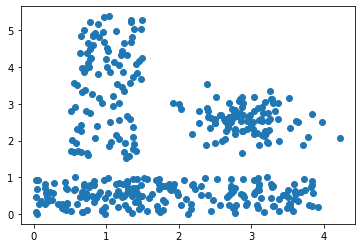

In [54]:
# Input data in following format [ [0.1, 0.5], [0.3, 0.1], ... ].
input_data = read_sample(FCPS_SAMPLES.SAMPLE_LSUN);#SAMPLE_TARGET
X=[i[0] for i in input_data]
Y=[i[1] for i in input_data]
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot()

**get geo location dataset**

In [26]:
!wget https://raw.githubusercontent.com/Praveendwivedi/VehicleRoutingProblem/main/clustering-algos/samplelocds.csv

--2021-05-29 18:07:57--  https://raw.githubusercontent.com/Praveendwivedi/VehicleRoutingProblem/main/clustering-algos/samplelocds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42008 (41K) [text/plain]
Saving to: ‘samplelocds.csv.1’

samplelocds.csv.1   100%[===================>]  41.02K  --.-KB/s    in 0.001s  

2021-05-29 18:07:57 (53.4 MB/s) - ‘samplelocds.csv.1’ saved [42008/42008]



In [48]:
import  pandas as pd
data=pd.read_csv('samplelocds.csv')
Y=data['Latitude']
X=data['Longitude']
data.head()
print(len(X))
input_data=[[X[i],Y[i]] for i in range(len(X))]

925


**visualize data**

[]

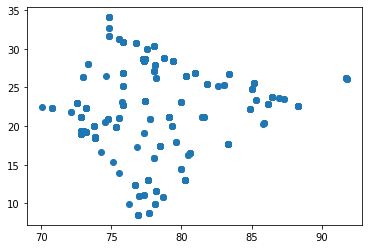

In [49]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.plot()

In [53]:
# import folium package
import folium
  
my_map3 = folium.Map(location = [28.5011226, 77.4099794],
                                        zoom_start = 1)
for i in input_data:
  folium.Marker(i[::-1]).add_to(my_map3)
my_map3.save(" my_map3.html ")
my_map3

# **Clustering algos**

1. **CURE**



[597, 633, 652, 679, 751, 808, 898, 383, 435, 542, 557, 631, 43, 95, 155, 226, 253, 682, 16, 67, 174, 469, 885, 204, 426, 443, 289, 309, 403, 548, 595, 386, 460, 500, 703, 752, 110, 192, 343, 636, 782, 905, 912, 916, 918, 393, 564, 400, 405, 411, 342, 369, 359, 385, 390, 314, 746, 334, 337, 340, 298, 837, 300, 302, 313, 280, 413, 292, 294, 296, 892, 599, 655, 623, 642, 649, 511, 587, 536, 549, 553, 489, 602, 504, 506, 510, 470, 472, 477, 480, 486, 432, 465, 452, 456, 457, 895, 861, 243, 821, 265, 268, 275, 224, 749, 225, 228, 238, 193, 327, 196, 208, 218, 182, 254, 183, 184, 187, 161, 796, 165, 169, 170, 869, 558, 111, 281, 124, 126, 149, 88, 872, 93, 94, 102, 69, 104, 80, 83, 86, 23, 197, 52, 53, 62, 0, 2, 3, 8, 22, 574, 816, 848, 820, 835, 841, 771, 773, 784, 790, 798, 714, 907, 719, 754, 757, 661, 884, 675, 683, 691, 33, 72, 130, 158, 177, 230, 278, 388, 434, 482, 520, 659, 855, 660, 903, 668, 35, 341, 503, 625, 640, 637, 866, 669, 888, 9, 55, 310, 404, 448, 17, 284, 429, 711, 725, 

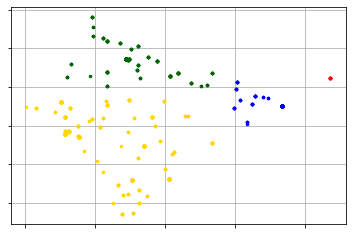

In [33]:
# Allocate three clusters.
n=4 #no. of clusters
cure_instance = cure(input_data, n);
cure_instance.process();
clusters = cure_instance.get_clusters();

# Visualize allocated clusters.
visualizer = cluster_visualizer();
visualizer.append_clusters(clusters, input_data);
print(max(clusters))
visualizer.show();

2. **OPTICS**

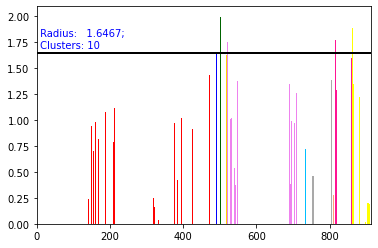

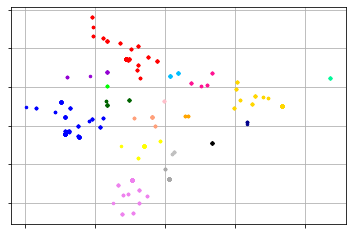

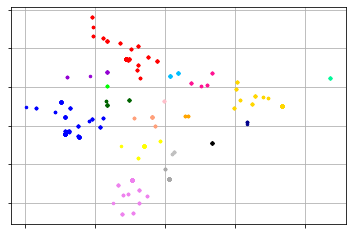

In [34]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.optics import optics, ordering_analyser, ordering_visualizer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# Read sample for clustering from some file
# sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)
sample = input_data
# Run cluster analysis where connectivity radius is bigger than real
radius = 2.0
neighbors = 3
amount_of_clusters = 10
optics_instance = optics(sample, radius, neighbors, amount_of_clusters)

# Performs cluster analysis
optics_instance.process()

# Obtain results of clustering
clusters = optics_instance.get_clusters()
noise = optics_instance.get_noise()
ordering = optics_instance.get_ordering()

# Visualize ordering diagram
analyser = ordering_analyser(ordering)
ordering_visualizer.show_ordering_diagram(analyser, amount_of_clusters)

# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
visualizer.show()

3. **k-means**

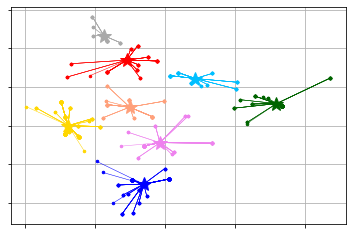

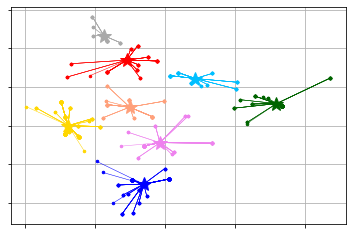

In [35]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.samples.definitions import FCPS_SAMPLES
from pyclustering.utils import read_sample

# Load list of points for cluster analysis.
# sample = read_sample(FCPS_SAMPLES.SAMPLE_LSUN)

# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(sample, 8).initialize()

# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(sample, initial_centers)

# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()

# Visualize obtained results
kmeans_visualizer.show_clusters(sample, clusters, final_centers)

**References:**
* [Clustering Geospatial Data](https://towardsdatascience.com/clustering-geospatial-data-f0584f0b04ec)